# ELE510 Image Processing with robot vision: LAB, Exercise 1, Fundamentals.

## Problem 1

**a)** What does a pixel value represent? What is the standard bit depth and why is it the common practice?

A pixel value represents the color or intensity of a single point in a digital image. Pixels are the smallest units of an image, and each pixel corresponds to a specific location on the image grid. The pixel value determines the visual characteristics of that specific point, such as its color, brightness, and sometimes transparency.

The standard bit depth depends on the image format. For example, the standard bit depth for a grayscale image is 8 bits, which means that each pixel has $2^8$ possible values. The standard bit depth for a color image is 24 bits, which means that each pixel has 8 bits for each color channel (RGB) so $2^{24}$ possible values.
The standard is the common practice because it is the minimum bit depth that can represent effectively without any visual artifacts like cunturing and sufficient for the human eye's perception of color and brightness. A higher bit depth would not have any visual improvement for the human eye but is sometimes used for professional applications in order to have more information to work with in post-processing. For example in the video industry, the standard bit depth is 10 bits (for each color) so $2^{30}$ possible values.

**b)** What is the difference between image processing and image analysis? What primary problems are they trying to solve?


Image processing involves modifying images to enhance their appearance or correcting defects caused by for example the lense (distorsion). Its main goal is to change how an image looks to make it better to understand its content. This can involve tasks like reducing noise, making images clearer, fixing colors, resizing, and applying filters. 

In contrast, image analysis focuses on getting useful information from images. It uses different methods and techniques to automatically study what's in an image and get important data. The main aim of image analysis is to get both numbers and qualities from images for things like science, medicine, industry, and other types of analysis. This can include tasks like finding objects, semantic segmentation, features extraction, patterns finding, and classification.

Image Processing Issues:
- Enhancement
- Restoration
- Color Adjustment
- Compression
- Filtering

Image Analysis Issues:

- Object Detection
- Image Segmentation
- Feature Extraction
- Pattern Recognition
- Image Classification
- Image Registration

**c)** Given a storage space of 512 GB, we would like to save a digital video recorded in grayscale that fills all the available memory. The video was recorded with no compression, a frame rate of 100 frames per second, and an image frame of $2048 \times 1024$ pixels. Then, how long would the lenght of the video be in time? Please provide an answer in HH:MM:SS format.

Each pixel takes 1 Byte of memory, a 2048x1024 frame is composed by $2^{21}$ pixels. Consequently each frame takes $2^{21}$ bytes of memory. The video is composed by 100 frames per second, so each second takes $2^{21} * 100$ bytes of memory. The total usable memory is 512 GB, which lets say is $512*1024*1024*1024$ bytes. In order to calculate the lenght of the video we have to divide the total usable memory by the memory taken by each second of video. 

In [2]:
fps=100
frame_height=1024
frame_width=2048
total_memory=512*1024*1024*1024

memory_by_sec=fps*frame_height*frame_width

seconds=(total_memory/memory_by_sec)
minutes=seconds/60
hours=minutes/60


print("Result:", "{:02}:{:02}:{:02}".format(int(hours), int(minutes) % 60, int(seconds) % 60))



Result: 00:43:41



## Problem 2

In this problem we use one image, `flower.jpg` (relative path: `./images/flower.jpg`).


**a)** Import the image; let the name of the flower image be **A**. Find the following properties: height, width, channels, filesize [+]. Be aware tha opencv represents image colar channel in the order BGR (blue, green, red) instead of RGB as is more common.  Matplotlib use RGB, so if we are using matplotlib to show images they need to be converted first.

**b)** Image **A** is represented as a 3D array in Python. With **A** as input we now want to extract 4 different 2D images:
   - **R** representing the red colour component, 
   - **G** representing the green colour component,
   - **B** representing the blue colour component, and
   - **Gr** representing a grey level version.
    
The rgb components are found by using `A[:,:,k]` where `k=1,2 and 3`. The grey level image can be imported using a particular flag (`cv2.IMREAD_GRAYSCALE`), or converted from an already imported color-image to grayscale (find the cv2 function yourself in the documentation). Use `matplotlib` to display the colour image and the 3 colour components in the same figure.

Describe how the different colour components contributes to different parts of the image (the petals and the background). Show the gray level image in a separate figure. Describe this image in relation to the colour components.


<div class="alert alert-block alert-info">
    The filesize can be checked in <b>bytes</b> using the following commands: 

```python
import os 
filesize = os.path.getsize(my_path)
```
</div>


In [3]:
# Import useful packages
import os # useful for the filesize
import cv2
import matplotlib.pyplot as plt 

# Complete the parts with "..."

########################################################
######## a) 
# Import the image, which is located in the folder images/ (you can download it from CANVAS)
A_path = './images/flower.jpg'
A = cv2.imread(A_path) 
# Convert the image from BGR (OpenCV standard) to RGB (standard)  
A = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)

# image properties
height = A.shape[0]
width = A.shape[1]
channels = A.shape[2]
filesize = A.size
 
print('Image Dimension    : ', A.shape) 
print('Image Height       : ', height)
print('Image Width        : ', width)
print('Number of Channels : ', channels)

## The results should be:
# Image Dimension    :  (667, 500, 3)
# Image Height       :  667
# Image Width        :  500
# Number of Channels :  3


Image Dimension    :  (667, 500, 3)
Image Height       :  667
Image Width        :  500
Number of Channels :  3


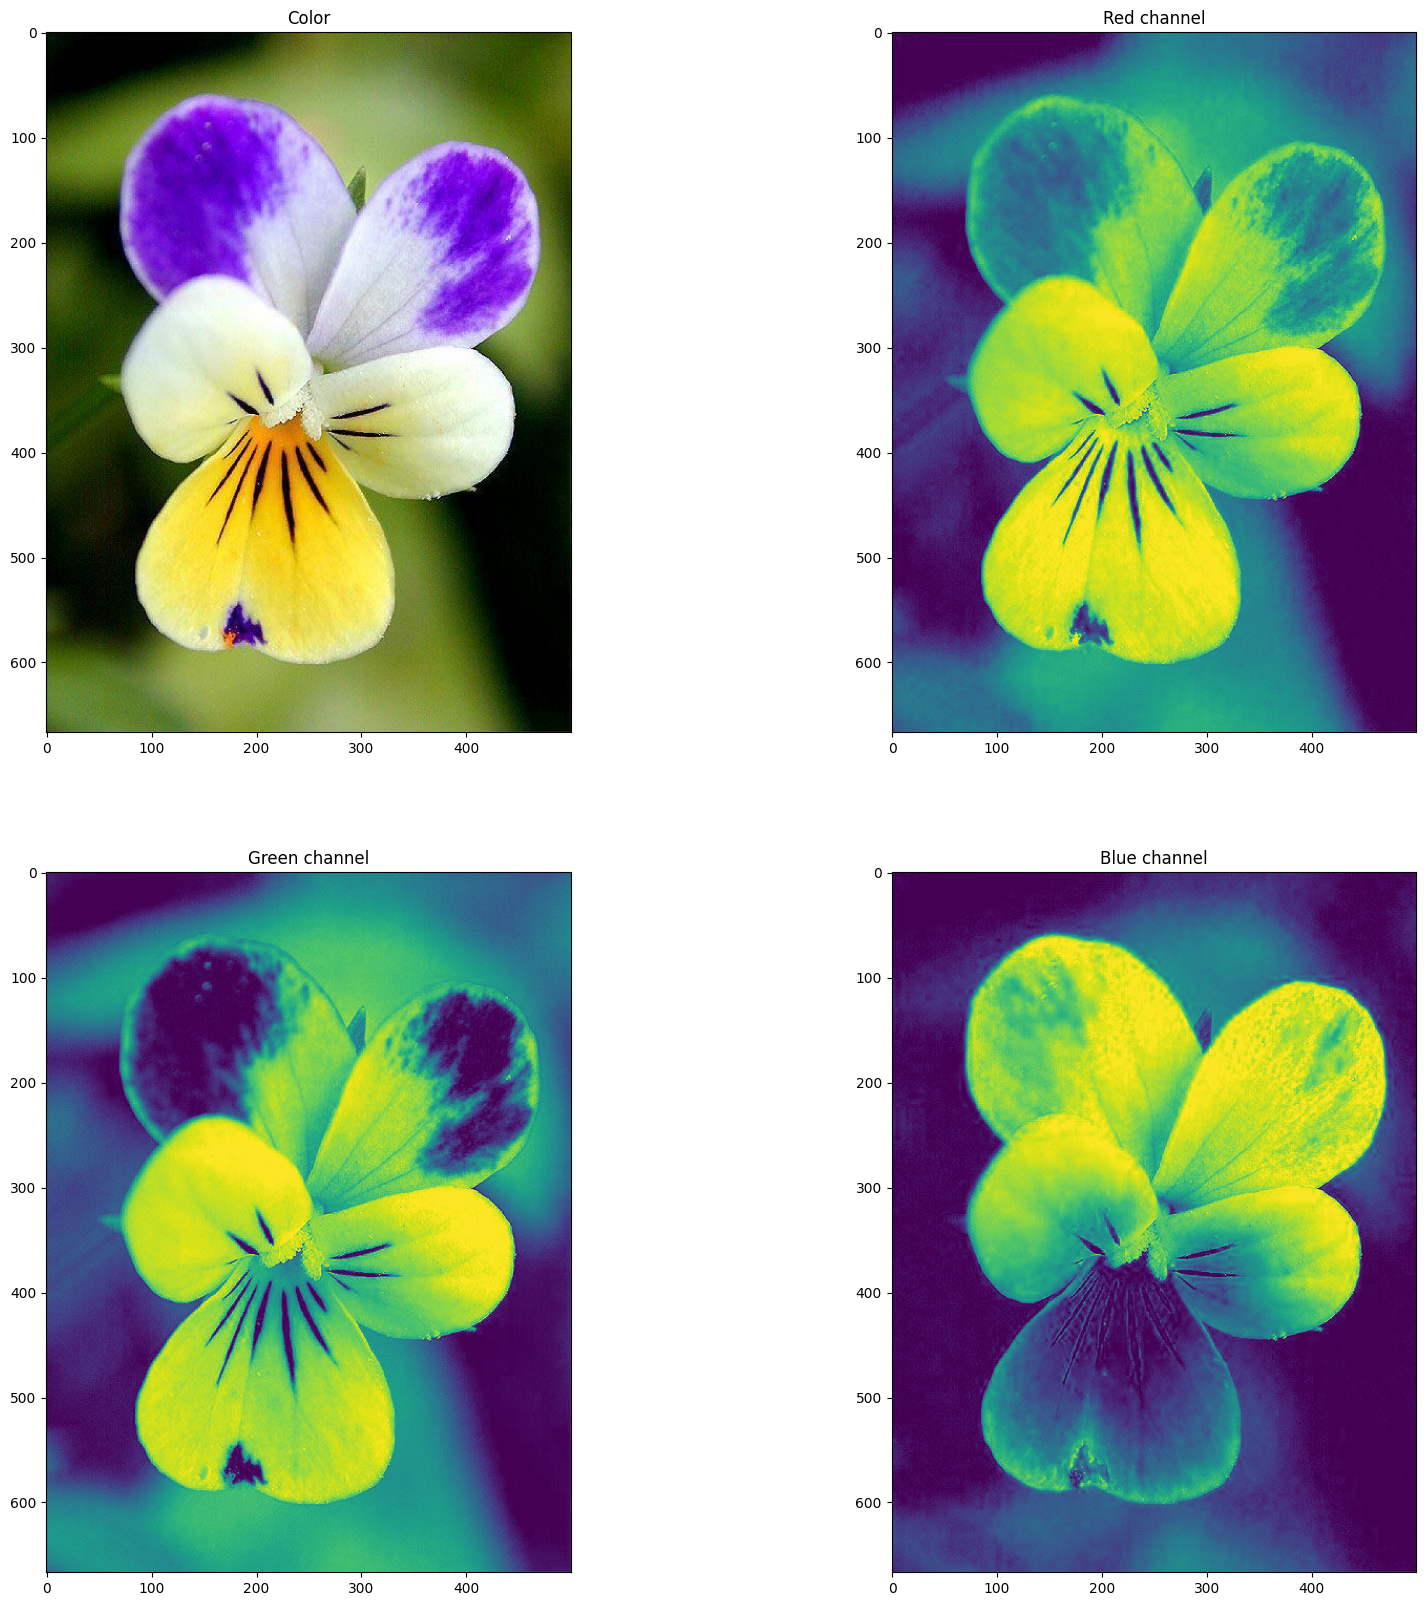

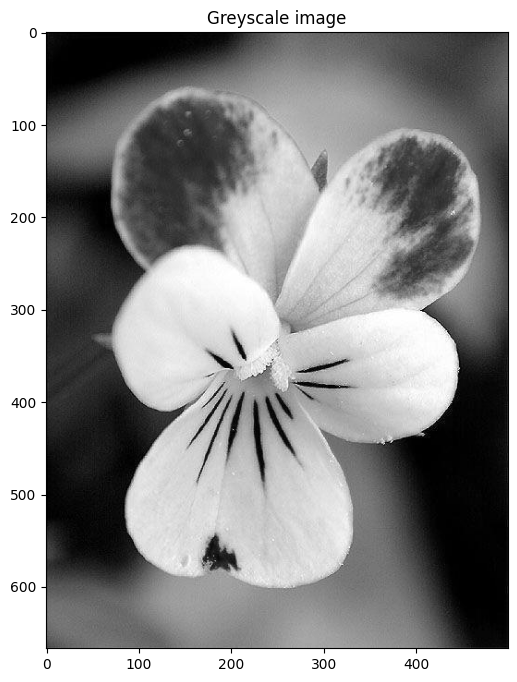

In [4]:
########################################################
######## b). 
# Extract 2D images (the various channels + grayscale)
R = A[:,:,0]
G = A[:,:,1]
B = A[:,:,2]


plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(A)
plt.title('Color')
plt.subplot(222)
plt.imshow(R)
plt.title('Red channel')
plt.subplot(223)
plt.imshow(G)
plt.title('Green channel')
plt.subplot(224)
plt.imshow(B)
plt.title('Blue channel')
plt.show()

# Greyscale image
Gr = cv2.imread(A_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(8,8))
plt.imshow(Gr, cmap='gray', vmin=0, vmax=255)
plt.title('Greyscale image')
plt.show()


**Answer to question 2 b)** (describe): 

We can see by separating the different components how they are more or less dominant in different petals. For example the Blue channel is very dominant in the top petals with respect to the others and almost not present at all in the bottom petal. The background is characterized by a stong presence of green and some red. There are areas almost black which lack the presence of any color. We can also notice that the white pedals have a high value for each component and the black areas have a low value for each component. 

As you can see in the followin code block the grayscale image and the green color channel are sorprisingly similar. It is very different especially in the bottom petal from the blue channel. The red channel is very similar to the grayscale image in the bottom petal but it is very different in the top petal where the stains of lack of color are more transparent and less evident.


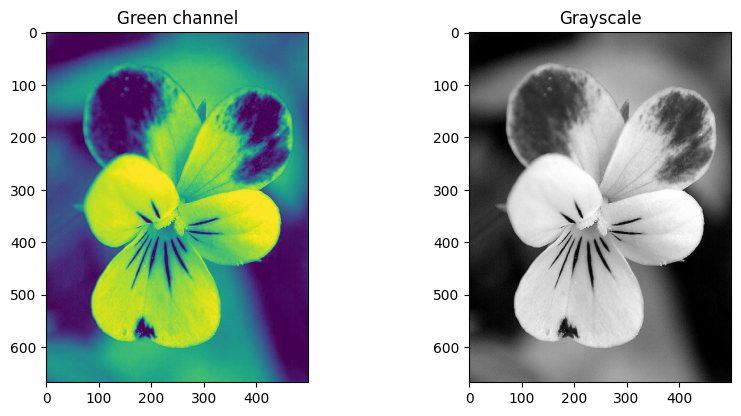

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(G)
plt.title('Green channel')
plt.subplot(222)
plt.imshow(Gr, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale')
plt.show()

## Problem 2 continues

**c)** The image data can be written to new files with a chosen format. Use `cv2.imwrite` and JPG. We want to study different degrees of compression by using `[cv2.IMWRITE_JPEG_QUALITY, jpg_quality]` as option in the `cv2.imwrite` function, where `cv2.IMWRITE_JPEG_QUALITY` is the quality flag, and `jpg_quality` is the selected quality for saving the image. Let `jpg_qualities` be `[25,50,75,100]` and make a graph that show the filesize in kB as a function of `jpg_qualities` for this image. When a repeated procedure is done, like in this case, it is efficient to make a script or a function for the problem. Display the compressed images for `jpg_qualities=25` and `jpg_qualities=75` (use `plt.imshow`). Study these images and discuss the degradation of the images caused by the compression.

**d)** A simple way of finding objects in an image is by using thresholding. The OpenCV function `threshold`. performs simple thresholding and ouputs a logical image matrix. We want to find a logical mask identifying the flower (foreground and not the background) in our image. We can do that by combining the result from thresholding the red component and the blue component, `Fmask = Gmask or Rmask`. `Gmask` is the output from thresholding the green component with a level of approximately (180/255) and `Rmask` is the result from thresholding the red component with level (150/255) approximately. Execute these operations and adjust the two levels for the best result. Display the final logical image `Fmask` and describe the result.



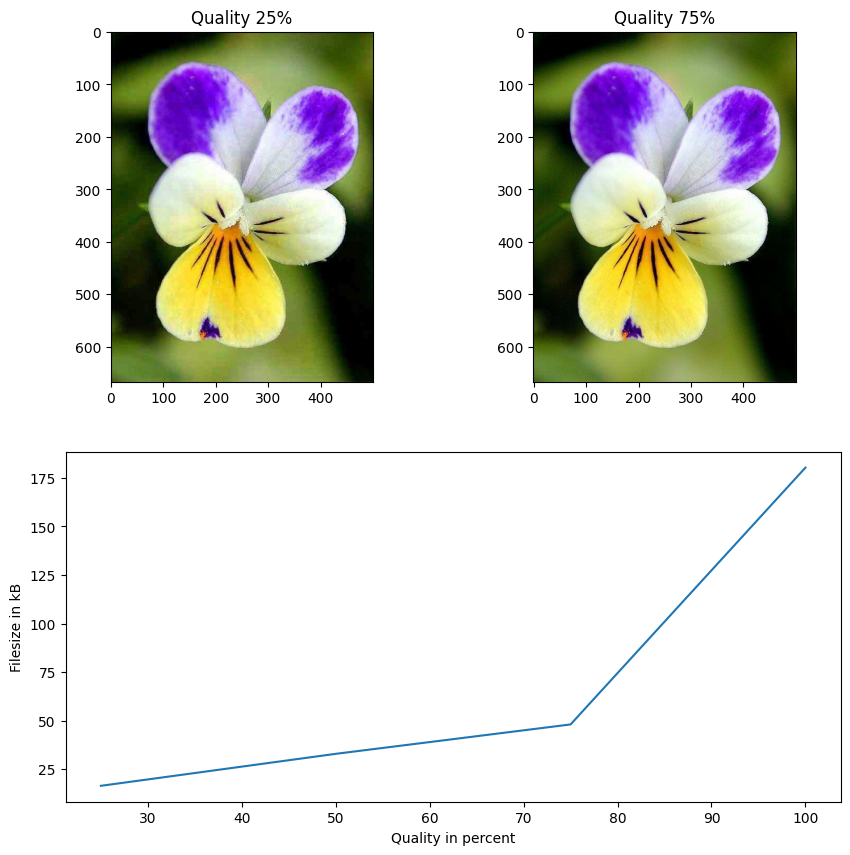

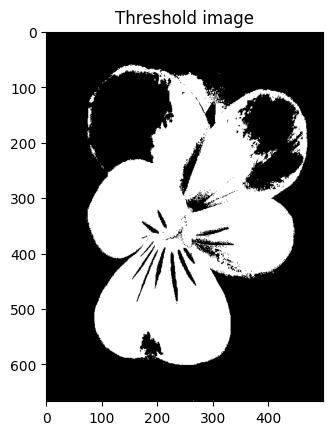

In [33]:
########################################################
######## c)
# Image compression
jpg_qualities = [25,50,75,100]
size = []

# write the images with a specific quality
for jpg_quality in jpg_qualities:
    filename = "./images/flower{}.jpg".format(str(jpg_quality))
    cv2.imwrite(filename, A, [int(cv2.IMWRITE_JPEG_QUALITY), jpg_quality])
    # Get the filesize of the image
    size.append(os.path.getsize(filename)/1024) # in kB

# Read the two images
img25 = cv2.imread("./images/flower25.jpg")
img75 = cv2.imread("./images/flower75.jpg")


plt.figure(figsize=(10, 10))
plt.subplot(212)
# Show the plot for the filesize in kB of the images generated
plt.plot(jpg_qualities, size)
plt.xlabel("Quality in percent")
plt.ylabel("Filesize in kB")
plt.subplot(221)
plt.imshow(img25)
plt.title("Quality 25%")
plt.subplot(222)
plt.imshow(img75)
plt.title("Quality 75%")
plt.show()

########################################################
######## d)
# Thresholding: Black and White (binary) images

# _, means that we are skipping the first output.  
# look in OpenCV documentation to find out what the first output of threshold is
_, Gmask = cv2.threshold(G, 195, 255, cv2.THRESH_BINARY)
_, Rmask = cv2.threshold(R, 170, 255, cv2.THRESH_BINARY)
Fmask = cv2.bitwise_or(Gmask, Rmask)

plt.imshow(Fmask, cmap='gray', vmin=0, vmax=255)
plt.title('Threshold image')
plt.show()

Filesize of 25% quality: 16.42 kB
Filesize of 50% quality: 32.89 kB
Filesize of 75% quality: 48.03 kB
Filesize of 100% quality: 180.31 kB


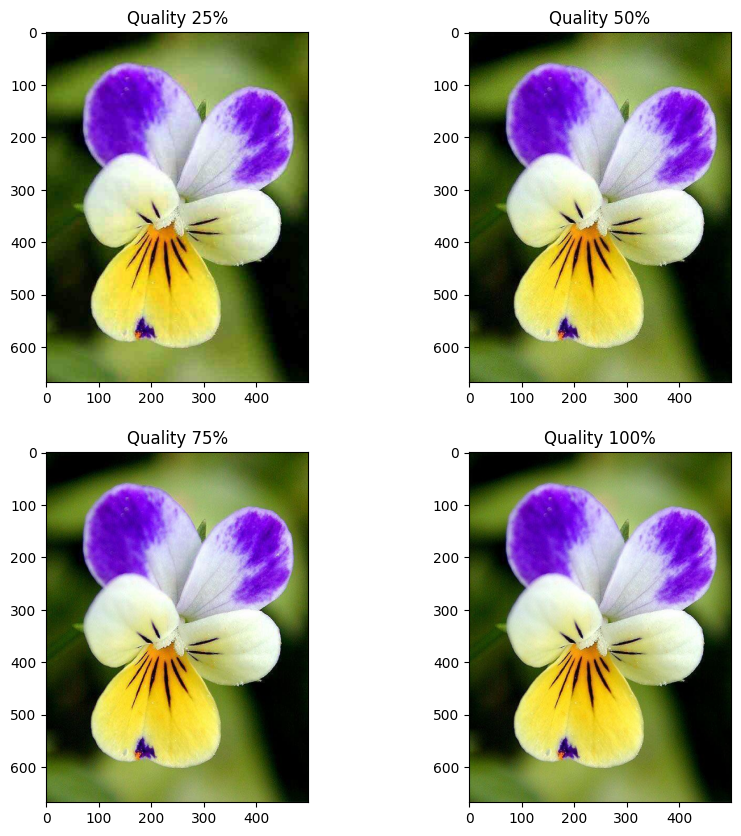

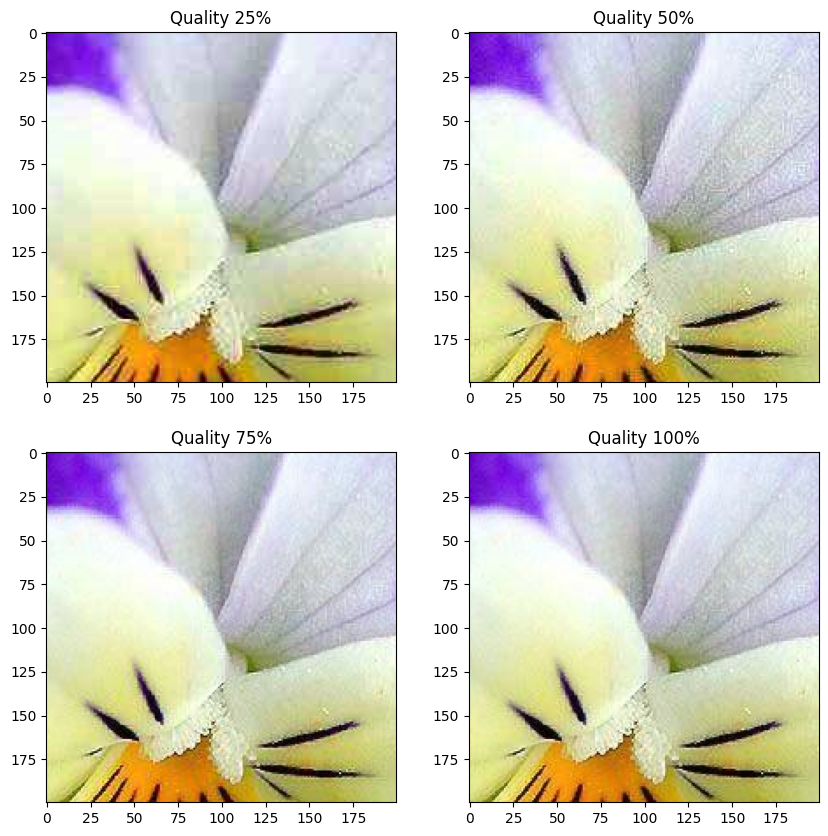

In [9]:
img25 = cv2.imread("./images/flower25.jpg")
img50 = cv2.imread("./images/flower50.jpg")
img75 = cv2.imread("./images/flower75.jpg")
img100 = cv2.imread("./images/flower100.jpg")

#print all file sizes
for i in jpg_qualities:
    filename = "./images/flower{}.jpg".format(str(i))
    print("Filesize of {}% quality: {:.2f} kB".format(i, os.path.getsize(filename)/1024))

#show in sublots all the images in jpg_qualities formats
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(img25)
plt.title("Quality 25%")
plt.subplot(222)
plt.imshow(img50)
plt.title("Quality 50%")
plt.subplot(223)
plt.imshow(img75)
plt.title("Quality 75%")
plt.subplot(224)
plt.imshow(img100)
plt.title("Quality 100%")
plt.show()

#cut the images in the middle zooming in and show the results
img25 = img25[200:400, 150:350]
img50 = img50[200:400, 150:350]
img75 = img75[200:400, 150:350]
img100 = img100[200:400, 150:350]

plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(img25)
plt.title("Quality 25%")
plt.subplot(222)
plt.imshow(img50)
plt.title("Quality 50%")
plt.subplot(223)
plt.imshow(img75)
plt.title("Quality 75%")
plt.subplot(224)
plt.imshow(img100)
plt.title("Quality 100%")
plt.show()

JPEG is a form of lossy compression a type of irreversible compression method that uses inexact approximations and partial data discarding to represent the content.
The images in the different compressions scale don't look too different one from each other in 25% steps but the difference between the first and the last is very noticable. It is very impressive how JPEG format can scale down the file size mantaining a good quality of the image. The image with 25% compression is only 16.42 kB compared to the 180.31 kB of the original image.

The biggest noticeable difference is in the textures and in particular in the stains on the petals and in the background that looks blurry compared to the original image.

Zooming in in the image the difference is more evident. The image with 25% compression in particular is very blurry and flattened, it shows the peculiar rectangular artifact of JPEG compression that creates inexistent shapes inside of the image almost like a mosaic. The image with 75% compression is very similar to the original image and it is very difficult to notice the difference.

Given the dimension reduction and the low difference in appearence the 75% version is a very good compromise between quality and size given the huge reduction in size going from 180.31 kB to 48.03 kB


## Problem 3

Write a function that extracts a rectangular region from an input image, commonly known as cropping. Give the function the name **image2roi** (roi = region of interest). Let this function work as follows:

**a)** Input parameters should be an iamge and the coordinates for the roi (fname, coords). First check if the image is colour or grey level. If it is colour a message should be printed out and the function closed (return). If it is a grey level image continue to the next step, **b)**.

**b)** The size of the image is computed and the image displayed with indexes shown along the axis. Extract the sub image (region of interest) given the coordinates, display it and the function ended.



In [12]:
'''
Function that takes in input an image and the coordinates for the ROI

''' 
def image2roi(fname, coords):
    #chech if image is grayscale or not
    if len(fname.shape) == 3:
        print("Error: The input image is a color image. This function works only with grayscale images.")
        return
    else:
        roi = fname[coords[0]:coords[1], coords[2]:coords[3]]

    # Plot the greyscale image and the ROI based on the coords values
    plt.figure(figsize=(10,10))
    plt.subplot(121)
    plt.imshow(fname, cmap='gray', vmin=0, vmax=255)
    plt.title('Greyscale image')
    plt.subplot(122)
    plt.imshow(roi, cmap='gray', vmin=0, vmax=255)
    plt.title('ROI')
    plt.show()

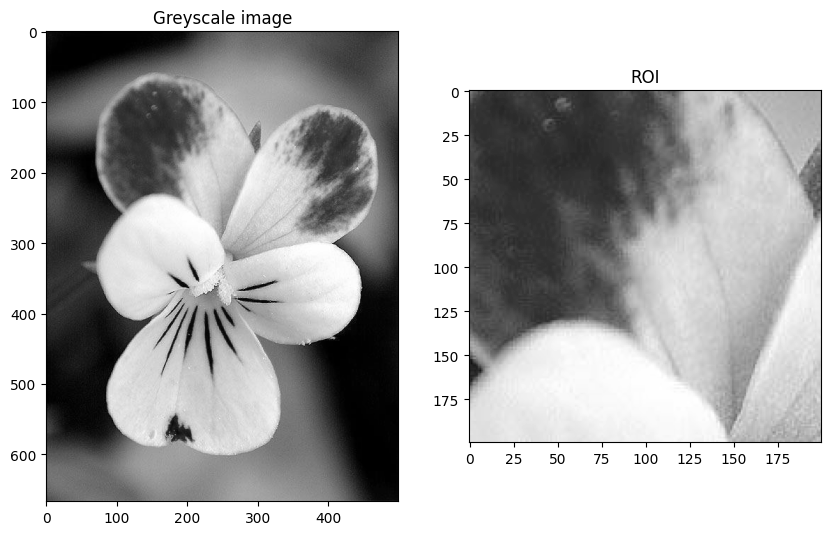

In [13]:
##  To test your function, complete the following lines:

coords = [100, 300, 100, 300] # [y1, y2, x1, x2]
img = cv2.imread(A_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

image2roi(img, coords)

## Problem 4

The representation of a digital image as a column vector is very useful in some occasions. We therefore include this here, from a practical view, using `python`. To explore this we start with a tiny test image. Let the image be


\begin{equation}
    F(x,y) = \begin{bmatrix} 1 & 2 & 3 & 4\\ 5 & 6 & 7 & 8\\
     9 & 10 & 11 & 12\\ 13 & 14 & 15 & 16\end{bmatrix}
\end{equation}


To produce this image with `numpy`, use:

```python
F = np.matrix('1 2 3 4;5 6 7 8;9 10 11 12;13 14 15 16')
```

**a)** Use `numpy` to retrieve the first element of the first column, the first column and the first row. Do the same for the last column and row.

**b)** Use the `numpy` function `reshape` to reconstruct the image matrix. Refer to [numpy.reshape](https://numpy.org/doc/1.18/reference/generated/numpy.reshape.html#numpy.reshape) for full documentation.

**c)** Use `numpy` to create a boolean array that contains the value `True` for values multiple of 5 and bigger than 6.  



In [32]:
# Import useful packages
import numpy as np
from pprint import pprint

F = np.matrix('1 2 3 4;5 6 7 8;9 10 11 12;13 14 15 16')
print("F:", end="")
pprint(F)

print("")
print("Problem 4, answers:")
print(" a)")

######## a)
f_ele = F[0, 0]
f_row = F[0, :]
f_col = F[:, 0]
print("f_ele: ", end="")
pprint(f_ele)
print("f_row: ")
pprint(f_row) 
print("f_col: ")
pprint(f_col)

l_row = F[-1, :]
l_col = F[:, -1]
print("l_row: ")
pprint(l_row) 
print("l_col: ")
pprint(l_col)

######## b)
print(" b)")

f_res = np.reshape(F, (1, -1))
print("f_res: ")
pprint(f_res)

######## c)
print(" c)")

f_bool = (F % 5 == 0) & (F > 6)
print("f_bool: ")
pprint(f_bool)


F:matrix([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])

Problem 4, answers:
 a)
f_ele: 1
f_row: 
matrix([[1, 2, 3, 4]])
f_col: 
matrix([[ 1],
        [ 5],
        [ 9],
        [13]])
l_row: 
matrix([[13, 14, 15, 16]])
l_col: 
matrix([[ 4],
        [ 8],
        [12],
        [16]])
 b)
f_res: 
matrix([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]])
 c)
f_bool: 
matrix([[False, False, False, False],
        [False, False, False, False],
        [False,  True, False, False],
        [False, False,  True, False]])
